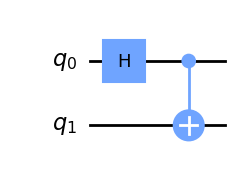

In [2]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
#qc.measure([0,1], [0,1])
qc.draw("mpl") # "mpl" is for Matplotlib Drawing without "mpl" circuit will look very simple, 
#we can also make'mpl'command as default draw for circuit 
#from setting congiguration of local jupyter notebook



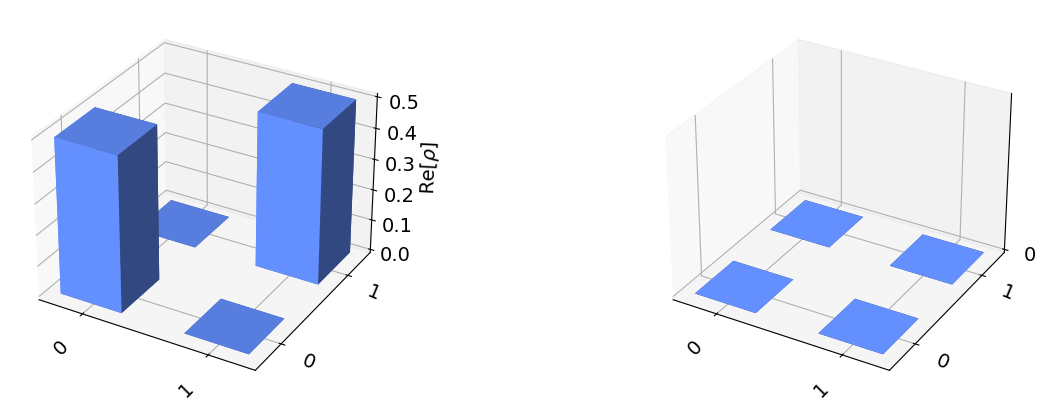

In [3]:
from qiskit.quantum_info import partial_trace, DensityMatrix
from qiskit.visualization import plot_state_city
d = DensityMatrix(qc)
p = partial_trace(d,[1])
plot_state_city(p)

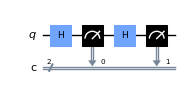

In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
qc = QuantumCircuit(1,2)
qc.h(0)
qc.measure(0,0)
qc.h(0)
qc.measure(0,1)
qc.draw("mpl", scale = 0.5) # we can adjust scale of the drawn circuit

In [5]:
AerSimulator().run(qc).result().get_counts()

{'11': 233, '00': 268, '10': 254, '01': 269}

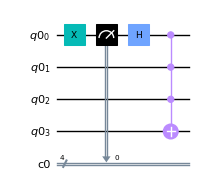

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
qr =QuantumRegister(4)
cr =ClassicalRegister(4)
qc = QuantumCircuit(qr, cr)
qc.x(0)
qc.measure(0,0)
qc.h(0)
qc.barrier
qc.mct([0,1,2],3)

#qc.draw("mpl")  instead of this we use following to draw
# Scale the mpl output to 1/2 the normal size
qc.draw(output='mpl', scale=0.5)

## Draw circuit in Latex 
___
This command `qc.draw('latex')` is to draw circuit in LaTex but currently, not working problably due not having appropriate package.

we can draw latex source code with the command `qc.draw('latex_source')`


In [7]:
qc.draw("text", fold=30)

┌───┐┌─┐┌───┐     
q0_0: ┤ X ├┤M├┤ H ├──■──
      └───┘└╥┘└───┘  │  
q0_1: ──────╫────────■──
            ║        │  
q0_2: ──────╫────────■──
            ║      ┌─┴─┐
q0_3: ──────╫──────┤ X ├
            ║      └───┘
c0: 4/══════╩═══════════
            0

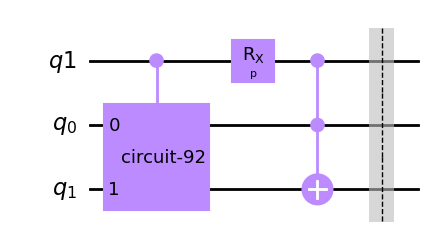

In [8]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
#How can I create a custom gate from a matrix?
qc.unitary([[0,1],
            [1,0]],0)
# How can I control the unitary part of a circuit?
qc = qc.control()

# How do I use parametrized circuit in qiskit?
from qiskit.circuit import Parameter
p=Parameter('p')
qc.rx(p,0)

#How can I implement a multi control Toffoli gate?
qc.ccx(0,1,2)

# What is qiskit barrier operation?
qc.barrier()

qc.draw("mpl")

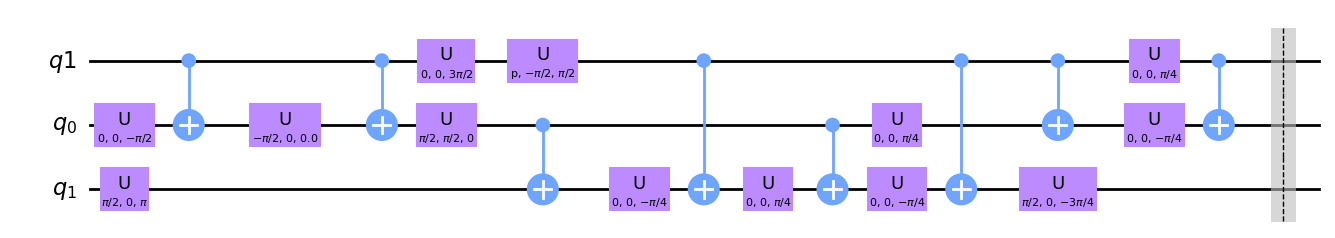

In [9]:
#How can I transpile a Quantum Circui?
from qiskit import transpile
qc = transpile (qc, basis_gates = ['u', 'cx'])
qc. draw('mpl')

## How to bundle several circuit in a single job?

Import necessary packages

In [28]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.providers.fake_provider import FakeVigo

In [29]:
vigo = FakeVigo()
qasm_sim = Aer.get_backend('qasm_simulator')

In [30]:
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.cx(0,1)
qc1.measure_all()


In [31]:
qc2 = QuantumCircuit(3)
qc2.h(0)
qc2.cx(0,1)
qc2.cx(1,2)
qc2.measure_all()


In [32]:
qc_list = [qc1,qc2]

In [33]:
job = execute(qc_list, qasm_sim)

In [34]:
job.result().get_counts()

[{'11': 489, '00': 535}, {'000': 505, '111': 519}]

# quantum Volume circuit

In [40]:
from qiskit.circuit.library import QuantumVolume

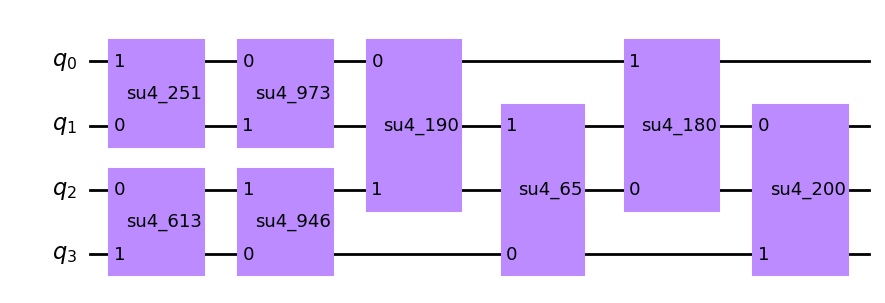

In [50]:
qc = QuantumVolume(4) 
qc.decompose().draw('mpl')
# it is reflection of quantum devices performance. circuit will change each time we run the code.